# Document Term Matrix and Word Clouds of Two Corpuses of Tweets

## Attribution
This code leverages strategies described in a [Natural Language Workshop by Alice Zhao](https://www.youtube.com/watch?v=xvqsFTUsOmc). Code referenced in the workshop is [located in this github repo](https://github.com/adashofdata/nlp-in-python-tutorial).  

## Notebook Input
* JSON file containing a **corpus** of 200 President Trump's coronavirus-related tweets, along with VADER and IBM Watson Tone Analyzer metadata
* JSON file containing a **corpus** of 200 President Trump's non-coronavirus-related tweets, along with VADER and IBM Watson Tone Analyzer metadata


## Notebook Output
This notebook does not output any files. Rather, it provides a list of most commonly used adjectives, as well as a word cloud of those adjectives for dataset described above for the Notebook Input

## Imports

In [1]:
import pandas as pd
import json
import nltk
import re
import string
import matplotlib.pyplot as plt
from nltk import word_tokenize, pos_tag

# To install
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

# To Install from Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer

## Create Dataframes from JSON files

In [2]:
with open('corpus_coronavirus_tweets_with_tone_and_sentiment.json', encoding="utf8") as f:
  temp_corpus_coronavirus_tweets = json.load(f)

with open('corpus_non_coronavirus_tweets_with_tone_and_sentiment.json', encoding="utf8") as f:
  temp_corpus_non_coronavirus_tweets = json.load(f)

pd.set_option('max_colwidth', 1000)
corpus_coronavirus_tweets_df     = pd.DataFrame({'text': temp_corpus_coronavirus_tweets['text']}, index=[0])
corpus_non_coronavirus_tweets_df = pd.DataFrame({'text': temp_corpus_non_coronavirus_tweets['text']}, index=[0])

## Clean the Text with RegEx

In [3]:
def clean_text_func(text):
    text = text.lower()
    # Make text lowercase, remove text in square brackets, remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)
    # Remove quotes
    text = re.sub('[‘’“”…]', '', text)
    # Remove leftover word 'amp'
    text = re.sub(' amp ', ' ', text)
    return text

clean_text = lambda x: clean_text_func(x)

pd.set_option('max_colwidth', 2000)
coronavirus_tweets_clean     = pd.DataFrame(corpus_coronavirus_tweets_df.text.apply(clean_text))
non_coronavirus_tweets_clean = pd.DataFrame(corpus_non_coronavirus_tweets_df.text.apply(clean_text))

## Grab Only the Adjectives

In [4]:
def get_adjectives(text):
    '''Given a string of text, tokenize the text and pull out the adjectives.'''
    is_adj = lambda pos: pos[:2] == 'JJR' or pos[:2] == 'JJ' or pos[:2] == 'JJS'
    tokenized = word_tokenize(text)
    adjectives = [word for (word, pos) in pos_tag(tokenized) if is_adj(pos)] 
    return ' '.join(adjectives)


# Get only the adjectives
coronavirus_tweets_adjectives_df     = pd.DataFrame(coronavirus_tweets_clean.text.apply(get_adjectives))
non_coronavirus_tweets_adjectives_df = pd.DataFrame(non_coronavirus_tweets_clean.text.apply(get_adjectives))

## Create a Word Count via CountVectorizer for Most Used Adjectives

In [6]:
cv = CountVectorizer()

coronavirus_tweets_cv = cv.fit_transform(coronavirus_tweets_adjectives_df.text)
coronavirus_tweets_adjs_dtm = pd.DataFrame(coronavirus_tweets_cv.toarray(), columns=cv.get_feature_names())
coronavirus_tweets_adjs_dtm.index = coronavirus_tweets_clean.index
coronavirus_tweets_adjs_dtm

non_coronavirus_tweets_cv = cv.fit_transform(non_coronavirus_tweets_adjectives_df.text)
non_coronavirus_tweets_adjs_dtm = pd.DataFrame(non_coronavirus_tweets_cv.toarray(), columns=cv.get_feature_names())
non_coronavirus_tweets_adjs_dtm.index = non_coronavirus_tweets_clean.index
non_coronavirus_tweets_adjs_dtm

coronavirus_tweets_adjs_dtm     = coronavirus_tweets_adjs_dtm.transpose()
non_coronavirus_tweets_adjs_dtm = non_coronavirus_tweets_adjs_dtm.transpose()

## Show Top 20 Adjectives for Each Set

In [12]:
# Find the top 20 adjectives
coronavirus_adj_top_dict     = {}
non_coronavirus_adj_top_dict = {}

for tweet_txt in coronavirus_tweets_adjs_dtm.columns:
    top = coronavirus_tweets_adjs_dtm[tweet_txt].sort_values(ascending=False).head(20)
    coronavirus_adj_top_dict[tweet_txt]= list(zip(top.index, top.values))

    
for tweet_txt in non_coronavirus_tweets_adjs_dtm.columns:
    top = non_coronavirus_tweets_adjs_dtm[tweet_txt].sort_values(ascending=False).head(20)
    non_coronavirus_adj_top_dict[tweet_txt]= list(zip(top.index, top.values))


print("Most used Adjectives in coronavirus-related tweets")
for word_dict in coronavirus_adj_top_dict[0]:
 print(word_dict)   

print()

print("Most used Adjectives in non-coronavirus-related tweets")
for word_dict in non_coronavirus_adj_top_dict[0]:
 print(word_dict)   

Most used Adjectives in coronavirus-related tweets
('great', 54)
('other', 27)
('good', 26)
('many', 25)
('fake', 24)
('new', 23)
('united', 16)
('federal', 13)
('more', 12)
('white', 12)
('early', 11)
('chinese', 10)
('bad', 9)
('strong', 8)
('big', 8)
('much', 8)
('late', 7)
('large', 6)
('same', 6)
('most', 6)

Most used Adjectives in non-coronavirus-related tweets
('great', 54)
('fake', 15)
('total', 12)
('new', 12)
('more', 11)
('strong', 11)
('big', 11)
('many', 10)
('american', 9)
('incredible', 9)
('complete', 8)
('true', 7)
('other', 7)
('military', 7)
('best', 6)
('second', 6)
('hard', 6)
('good', 6)
('supreme', 5)
('america', 5)


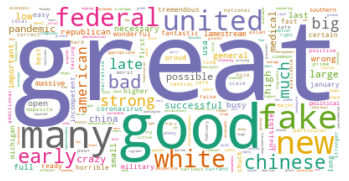

In [13]:
wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150)

wc.generate(coronavirus_tweets_adjectives_df.text[0])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

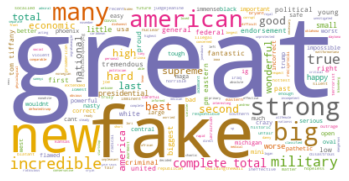

In [14]:
wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150)

wc.generate(non_coronavirus_tweets_adjectives_df.text[0])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## Summary

We wanted to find out what the most used adjectives were for the coronavirus-related corpus of tweets, and the non-coronavirus-related corpus of tweets.

Here are my observations:
* Trump uses the word "Great" and "Fake" a lot in general in his tweets